## Isaac Emmanuel Chávez Fuentes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load rankings data here:

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

print(wood.head())
print(steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

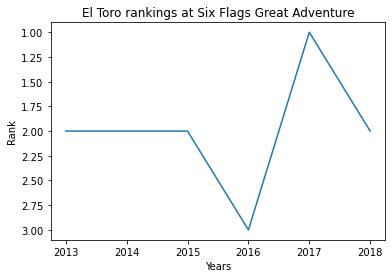

<Figure size 432x288 with 0 Axes>

In [3]:

# write function to plot rankings over time for 1 roller coaster here:

def ranking_plot(name, dataframe, park_name):
    coaster = dataframe[['Rank', 'Year of Rank']][(dataframe.Name== name) & (dataframe.Park == park_name)].sort_values(by=['Year of Rank'])
    ax = plt.subplot()
    
    plt.plot(coaster['Year of Rank'], coaster['Rank'])
    plt.title(name +" rankings at " + park_name )
    plt.ylabel("Rank")
    plt.xlabel("Years")

    ax.invert_yaxis()
    plt.show()
    



ranking_plot("El Toro", wood, 'Six Flags Great Adventure')

plt.clf()

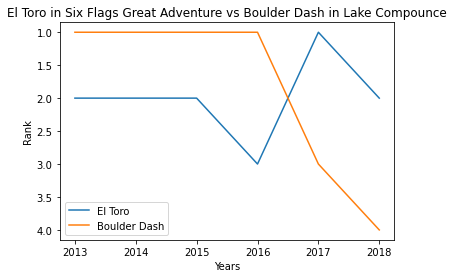

<Figure size 432x288 with 0 Axes>

In [4]:
# write function to plot rankings over time for 2 roller coasters here:

def ranking_plot(name1, name2, dataframe1, dataframe2 , park_name1, park_name2):
    coaster1 = dataframe1[['Rank', 'Year of Rank']][(dataframe1.Name== name1) & (dataframe1.Park == park_name1)].sort_values(by=['Year of Rank'])
    coaster2 = dataframe2[['Rank', 'Year of Rank']][(dataframe2.Name== name2) & (dataframe2.Park == park_name2)].sort_values(by=['Year of Rank'])

    
    ax = plt.subplot()
    
    plt.plot(coaster1['Year of Rank'], coaster1['Rank'])
    plt.plot(coaster2['Year of Rank'], coaster2['Rank'])
    plt.title(name1 +" in " +park_name1 +" vs " + name2 + " in "+park_name2 )
    plt.legend([name1, name2])
    plt.ylabel("Rank")
    plt.xlabel("Years")

    ax.invert_yaxis()
    plt.show()
    



ranking_plot("El Toro", "Boulder Dash", wood, wood, 'Six Flags Great Adventure', 'Lake Compounce')

plt.clf()

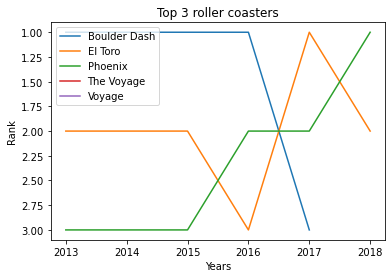

<Figure size 432x288 with 0 Axes>

In [5]:
# write function to plot top n rankings over time here:

def top_coasters(n, dataframe):
    
    top_n_coaster = dataframe[['Name', 'Park', 'Rank', 'Year of Rank']][dataframe.Rank <= n ].sort_values(by=['Year of Rank'])
    
    coaster_names = top_n_coaster.Name.unique()

    
    ax = plt.subplot()
    ax.invert_yaxis()
    for coaster in coaster_names:
        
        coaster_ranking = top_n_coaster[top_n_coaster['Name'] == coaster]
        
        plt.plot(coaster_ranking['Year of Rank'], 
                coaster_ranking['Rank'])
        
    plt.legend(coaster_names)
    plt.xlabel('Years')
    plt.ylabel("Rank")
    plt.title("Top "+ str(n) + " roller coasters")
    plt.show()

top_coasters(3, wood)

plt.clf()

In [6]:
# load roller coaster data here:
roller_coaster = pd.read_csv("roller_coasters.csv")
print(roller_coaster.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


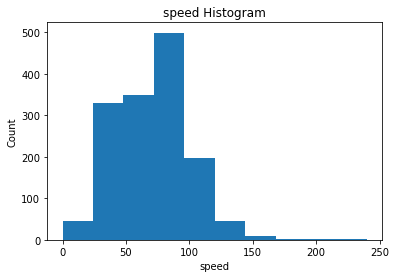

<Figure size 432x288 with 0 Axes>

In [7]:
# write function to plot histogram of column values here:


def histogram_maker(dataframe, column):
    
    dataframe[column].dropna(inplace=True)
    plt.hist(dataframe[column])
    plt.title(column + " Histogram")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

histogram_maker(roller_coaster, 'speed')    
    
plt.clf()


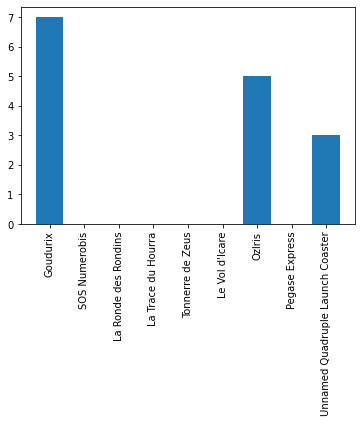

<Figure size 432x288 with 0 Axes>

In [8]:
# write function to plot inversions by coaster at a park here:

def inversions(dataframe, park_name):
    park_df = dataframe[['name', 'num_inversions']][dataframe.park == park_name]
    
    ax = plt.subplot()
    x = range(len(park_df.name))
    plt.bar( x , park_df['num_inversions'] )
    plt.xticks(rotation=90)
    ax.set_xticks(x)
    ax.set_xticklabels(park_df.name.values)
    plt.show()
    
inversions(roller_coaster, "Parc Asterix")

plt.clf()

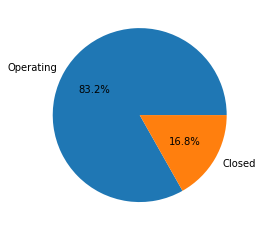

<Figure size 432x288 with 0 Axes>

In [9]:
# write function to plot pie chart of operating status here:

def pie_chart(dataframe):

    #dataframe['statusf'] = dataframe.apply(lambda x: 1 if x.status == "status.operating" else 0, axis=1)
    #total = len(dataframe['statusf'])
    #operations = np.sum(dataframe['statusf'])
    
    operating_coasters = dataframe[dataframe['status'] == 'status.operating']
    closed_coasters = dataframe[dataframe['status'] == 'status.closed.definitely']
    
    status_counts = [len(operating_coasters), len(closed_coasters)]
    
    plt.pie(status_counts, autopct='%0.1f%%', labels=['Operating','Closed'])
    plt.show()

pie_chart(roller_coaster)
    
plt.clf()

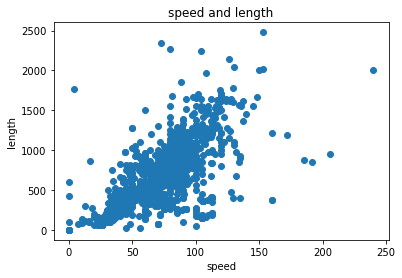

<Figure size 432x288 with 0 Axes>

In [10]:
# write function to create scatter plot of any two numeric columns here:


def scatter_func(dataframe, column1, column2):
    
    plt.scatter(dataframe[column1], dataframe[column2])
    plt.title(column1+" and "+ column2)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

scatter_func(roller_coaster,'speed', 'length' )
    
plt.clf()